# 14-Laptop-Price-Prediction-Regression

In [2]:
#import pandas as pd
#import numpy as np

In [3]:
#df = pd.read_csv("laptop_data.csv")

## EDA

In [5]:
#df.head()

## Data Exploration

In [7]:
#df.info()

In [8]:
#df["Ram"].unique()

In [9]:
#df['Company'] = df['Company'].astype('category')

In [10]:
#df['TypeName'] = df['TypeName'].astype('category')

In [11]:
#df['ScreenResolution'] = df['ScreenResolution'].astype('category')

In [12]:
#df['Cpu'] = df['Cpu'].astype('category')

In [13]:
#df["Ram"] = df["Ram"].str.replace("GB", "", regex=True)

In [14]:
#df['Ram'] = df['Ram'].astype('int')

In [15]:
#replace_dict = {"GB": "", "GB Flash Storage": "","TB HDD": "024", "GB SSD": "","GB HDD": "", "Hybrid": "","GB Hybrid": "",".0TB Hybrid": "024",}

### Stuck, lets fresh start

In [17]:
import pandas as pd

In [18]:
df = pd.read_csv("laptop_data.csv")

In [19]:
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [20]:
df.Company = df.Company.astype("category")

In [21]:
df = pd.concat([df, pd.get_dummies(df.Company)], axis=1)

In [22]:
df["ScreenResolution"] = df.ScreenResolution.str.split(" ").apply(lambda x: x[-1])

In [23]:
df["Screen Width"] = df["ScreenResolution"].str.split("x").apply(lambda x : x[0])

In [24]:
df["Screen Height"] = df["ScreenResolution"].str.split("x").apply(lambda x : x[1])

In [25]:
df = df.drop("ScreenResolution", axis=1)

In [26]:
df["Cpu Brand"] = df.Cpu.str.split(" ").apply(lambda x: x[0])

In [27]:
df["Cpu Frequency"] = df.Cpu.str.split(" ").apply(lambda x: x[-1])

In [28]:
df = df.drop("Cpu", axis=1)

In [29]:
df

,Unnamed: 0,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,...,Microsoft,Razer,Samsung,Toshiba,Vero,Xiaomi,Screen Width,Screen Height,Cpu Brand,Cpu Frequency
0,0,Apple,Ultrabook,13.3,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,...,False,False,False,False,False,False,2560,1600,Intel,2.3GHz
1,1,Apple,Ultrabook,13.3,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,...,False,False,False,False,False,False,1440,900,Intel,1.8GHz
2,2,HP,Notebook,15.6,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,...,False,False,False,False,False,False,1920,1080,Intel,2.5GHz
3,3,Apple,Ultrabook,15.4,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,...,False,False,False,False,False,False,2880,1800,Intel,2.7GHz
4,4,Apple,Ultrabook,13.3,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,...,False,False,False,False,False,False,2560,1600,Intel,3.1GHz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400,...,False,False,False,False,False,False,1920,1080,Intel,2.5GHz
1299,1299,Lenovo,2 in 1 Convertible,13.3,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200,...,False,False,False,False,False,False,3200,1800,Intel,2.5GHz
1300,1300,Lenovo,Notebook,14.0,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200,...,False,False,False,False,False,False,1366,768,Intel,1.6GHz
1301,1301,HP,Notebook,15.6,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200,...,False,False,False,False,False,False,1366,768,Intel,2.5GHz


In [30]:
df["Cpu Frequency"] = df["Cpu Frequency"].str[:-3]

In [31]:
df

,Unnamed: 0,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,...,Microsoft,Razer,Samsung,Toshiba,Vero,Xiaomi,Screen Width,Screen Height,Cpu Brand,Cpu Frequency
0,0,Apple,Ultrabook,13.3,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,...,False,False,False,False,False,False,2560,1600,Intel,2.3
1,1,Apple,Ultrabook,13.3,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,...,False,False,False,False,False,False,1440,900,Intel,1.8
2,2,HP,Notebook,15.6,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,...,False,False,False,False,False,False,1920,1080,Intel,2.5
3,3,Apple,Ultrabook,15.4,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,...,False,False,False,False,False,False,2880,1800,Intel,2.7
4,4,Apple,Ultrabook,13.3,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,...,False,False,False,False,False,False,2560,1600,Intel,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400,...,False,False,False,False,False,False,1920,1080,Intel,2.5
1299,1299,Lenovo,2 in 1 Convertible,13.3,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200,...,False,False,False,False,False,False,3200,1800,Intel,2.5
1300,1300,Lenovo,Notebook,14.0,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200,...,False,False,False,False,False,False,1366,768,Intel,1.6
1301,1301,HP,Notebook,15.6,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200,...,False,False,False,False,False,False,1366,768,Intel,2.5


In [32]:
df["Ram"] = df["Ram"].str[:-2]

In [33]:
df

,Unnamed: 0,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,...,Microsoft,Razer,Samsung,Toshiba,Vero,Xiaomi,Screen Width,Screen Height,Cpu Brand,Cpu Frequency
0,0,Apple,Ultrabook,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,...,False,False,False,False,False,False,2560,1600,Intel,2.3
1,1,Apple,Ultrabook,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,...,False,False,False,False,False,False,1440,900,Intel,1.8
2,2,HP,Notebook,15.6,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,...,False,False,False,False,False,False,1920,1080,Intel,2.5
3,3,Apple,Ultrabook,15.4,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,...,False,False,False,False,False,False,2880,1800,Intel,2.7
4,4,Apple,Ultrabook,13.3,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,...,False,False,False,False,False,False,2560,1600,Intel,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400,...,False,False,False,False,False,False,1920,1080,Intel,2.5
1299,1299,Lenovo,2 in 1 Convertible,13.3,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200,...,False,False,False,False,False,False,3200,1800,Intel,2.5
1300,1300,Lenovo,Notebook,14.0,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200,...,False,False,False,False,False,False,1366,768,Intel,1.6
1301,1301,HP,Notebook,15.6,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200,...,False,False,False,False,False,False,1366,768,Intel,2.5


In [34]:
df["Ram"].astype("int")

0        8
1        8
2        8
3       16
4        8
        ..
1298     4
1299    16
1300     2
1301     6
1302     4
Name: Ram, Length: 1303, dtype: int32

In [35]:
df["Cpu Frequency"] = df["Cpu Frequency"].astype("float")

In [36]:
df["Screen Width"] = df["Screen Width"].astype("int")
df["Screen Height"] = df["Screen Height"].astype("int")

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'Inches'}>],
       [<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Screen Width'}>],
       [<Axes: title={'center': 'Screen Height'}>,
        <Axes: title={'center': 'Cpu Frequency'}>]], dtype=object)

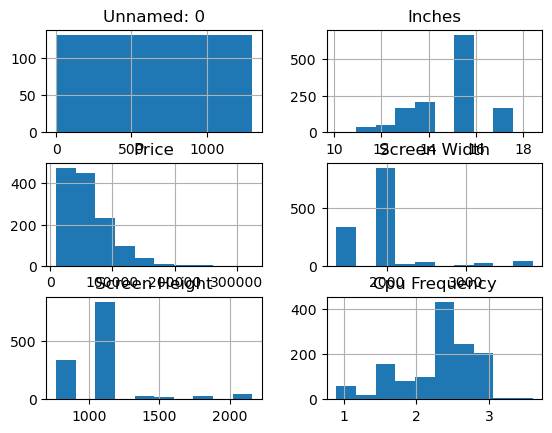

In [37]:
df.hist()

In [38]:
df["Memory Amount"] = df.Memory.str.split(" ").apply(lambda x: x[0])

In [39]:
df["Memory Type"] = df.Memory.str.split(" ").apply(lambda x: x[-1])

In [40]:
def turn_memory_into_MB(value):
    if "GB" in value:
        return float(value[:value.find("GB")]) * 1000
    elif "TB" in value:
        return float(value[:value.find("TB")]) * 1000000

In [41]:
df["Memory Amount"] = df["Memory Amount"].apply(turn_memory_into_MB)

In [42]:
df = df.drop("Memory", axis=1)

In [43]:
df["Weight"] = df["Weight"].str[:-2]

In [44]:
df["Weight"] = df["Weight"].astype("float")

In [45]:
df["Gpu Brand"] = df.Gpu.str.split(" ").apply(lambda x: x[0])

In [46]:
df = df.drop("Gpu", axis=1)

In [47]:
df = df.join(pd.get_dummies(df.OpSys))
df = df.drop("OpSys", axis=1)

In [122]:
df = df.drop("Company", axis=1)

In [98]:
cpu_categories = pd.get_dummies(df["Cpu Brand"])

In [102]:
cpu_categories.columns = [col + "_CPU" for col in cpu_categories.columns]

In [104]:
df = df.join(cpu_categories)

In [106]:
df = df.drop("Cpu Brand", axis=1)

In [110]:
gpu_categories = pd.get_dummies(df["Gpu Brand"])
gpu_categories.columns = [col + "_GPU" for col in gpu_categories.columns]
df = df.join(gpu_categories)
df = df.drop("Gpu Brand", axis=1)

In [126]:
df["Ram"] = df["Ram"].astype("int")


In [132]:
df.TypeName.value_counts()

TypeName
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: count, dtype: int64

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 46 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1303 non-null   int64  
 1   TypeName       1303 non-null   object 
 2   Inches         1303 non-null   float64
 3   Ram            1303 non-null   int32  
 4   Weight         1303 non-null   float64
 5   Price          1303 non-null   float64
 6   Acer           1303 non-null   bool   
 7   Apple          1303 non-null   bool   
 8   Asus           1303 non-null   bool   
 9   Chuwi          1303 non-null   bool   
 10  Dell           1303 non-null   bool   
 11  Fujitsu        1303 non-null   bool   
 12  Google         1303 non-null   bool   
 13  HP             1303 non-null   bool   
 14  Huawei         1303 non-null   bool   
 15  LG             1303 non-null   bool   
 16  Lenovo         1303 non-null   bool   
 17  MSI            1303 non-null   bool   
 18  Mediacom

In [144]:
df = pd.concat([df, pd.get_dummies(df.TypeName)], axis=1)

In [150]:
df = df.drop("TypeName", axis=1)

In [170]:
df = pd.concat([df, pd.get_dummies(df['Memory Type'])], axis=1)

In [172]:
df = df.drop("Memory Type", axis=1)

<Axes: >

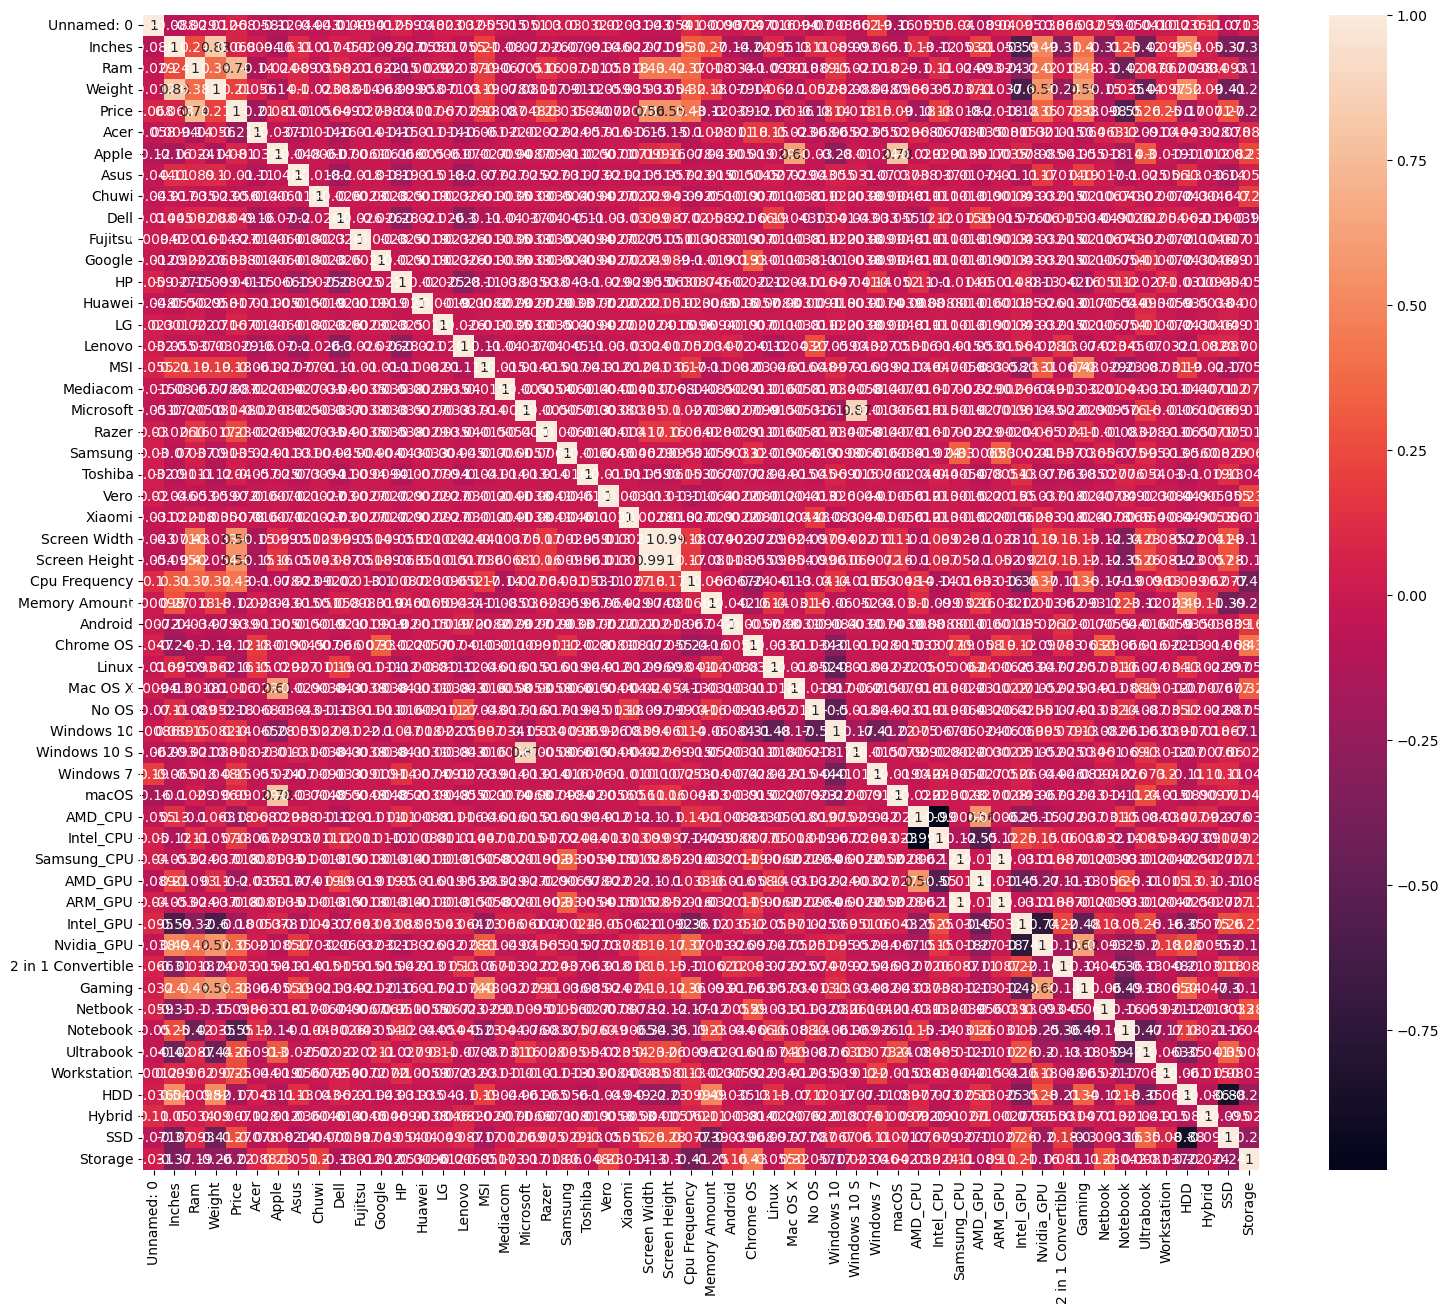

In [178]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(18,15))
sns.heatmap(df.corr(), annot=True)

In [180]:
target_correlations = df.corr()["Price"].apply(abs).sort_values()

In [182]:
target_correlations

Xiaomi                0.000776
Hybrid                0.007051
Asus                  0.010376
Mac OS X              0.015656
Huawei                0.016851
Windows 10 S          0.018312
ARM_GPU               0.018431
Samsung_CPU           0.018431
Fujitsu               0.027135
Lenovo                0.029007
Samsung               0.034584
Google                0.038086
Android               0.038700
Toshiba               0.040339
HP                    0.041291
Microsoft             0.047562
Dell                  0.048509
Chuwi                 0.055646
LG                    0.067053
Unnamed: 0            0.067984
Inches                0.068197
Vero                  0.071972
2 in 1 Convertible    0.072675
Apple                 0.080688
Mediacom              0.087161
macOS                 0.089928
Netbook               0.097572
Chrome OS             0.118684
Memory Amount         0.122365
Windows 10            0.137048
Windows 7             0.152381
Linux                 0.162060
HDD     

In [188]:
selected_features = target_correlations[-21:].index

In [190]:
selected_features

Index(['No OS', 'MSI', 'AMD_CPU', 'Intel_CPU', 'Intel_GPU', 'AMD_GPU', 'Acer',
       'Weight', 'Storage', 'Razer', 'Workstation', 'Ultrabook', 'SSD',
       'Nvidia_GPU', 'Gaming', 'Cpu Frequency', 'Notebook', 'Screen Height',
       'Screen Width', 'Ram', 'Price'],
      dtype='object')

In [194]:
limited_df = df[selected_features]

In [196]:
limited_df

,No OS,MSI,AMD_CPU,Intel_CPU,Intel_GPU,AMD_GPU,Acer,Weight,Storage,Razer,...,Ultrabook,SSD,Nvidia_GPU,Gaming,Cpu Frequency,Notebook,Screen Height,Screen Width,Ram,Price
0,False,False,False,True,True,False,False,1.37,False,False,...,True,True,False,False,2.3,False,1600,2560,8,71378.6832
1,False,False,False,True,True,False,False,1.34,True,False,...,True,False,False,False,1.8,False,900,1440,8,47895.5232
2,True,False,False,True,True,False,False,1.86,False,False,...,False,True,False,False,2.5,True,1080,1920,8,30636.0000
3,False,False,False,True,False,True,False,1.83,False,False,...,True,True,False,False,2.7,False,1800,2880,16,135195.3360
4,False,False,False,True,True,False,False,1.37,False,False,...,True,True,False,False,3.1,False,1600,2560,8,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,False,False,False,True,True,False,False,1.80,False,False,...,False,True,False,False,2.5,False,1080,1920,4,33992.6400
1299,False,False,False,True,True,False,False,1.30,False,False,...,False,True,False,False,2.5,False,1800,3200,16,79866.7200
1300,False,False,False,True,True,False,False,1.50,True,False,...,False,False,False,False,1.6,True,768,1366,2,12201.1200
1301,False,False,False,True,False,True,False,2.19,False,False,...,False,False,False,False,2.5,True,768,1366,6,40705.9200


<Axes: >

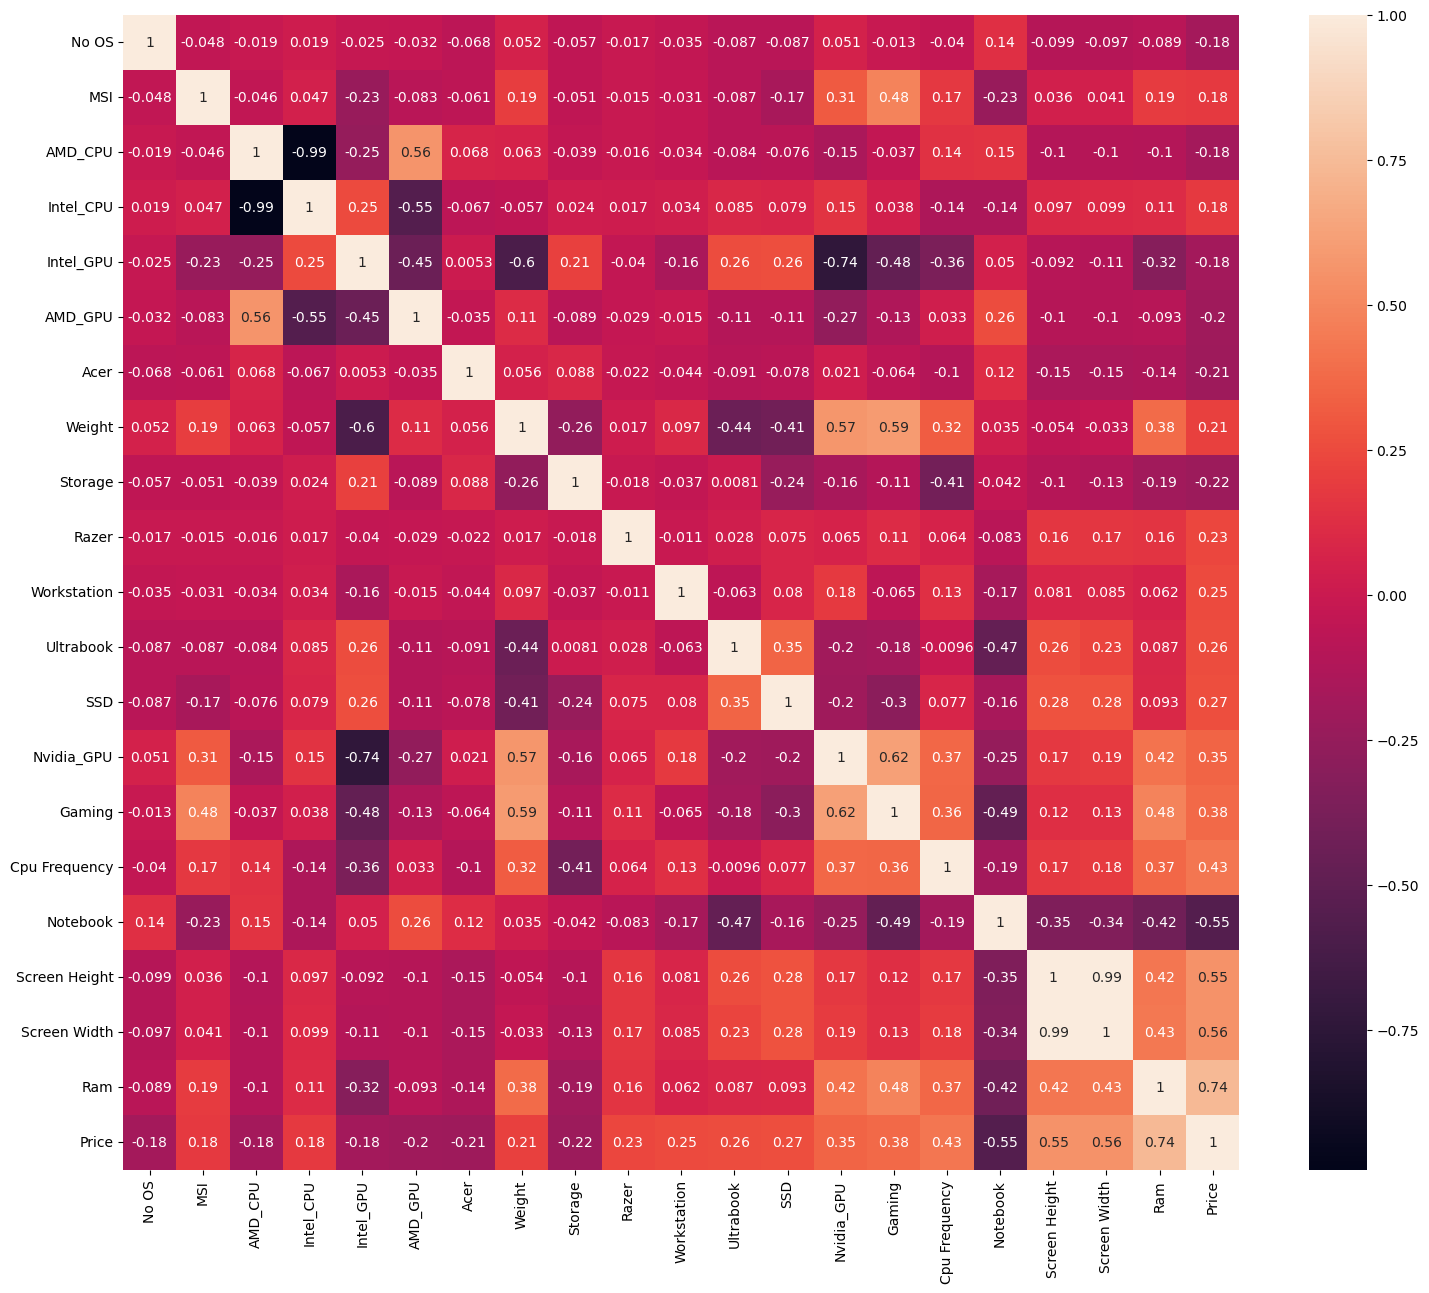

In [198]:
plt.figure(figsize=(18,15))
sns.heatmap(limited_df.corr(), annot=True)

In [202]:
from sklearn.preprocessing import StandardScaler

In [204]:
from sklearn.model_selection import train_test_split

In [206]:
from sklearn.ensemble import RandomForestRegressor

In [210]:
X, y = limited_df.drop("Price",axis=1), limited_df["Price"]
scaler = StandardScaler()

In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [218]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [220]:
forest = RandomForestRegressor()

forest.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [222]:
forest.score(X_test_scaled, y_test)

0.792314685911876

In [224]:
y__pred= forest.predict(X_test_scaled)

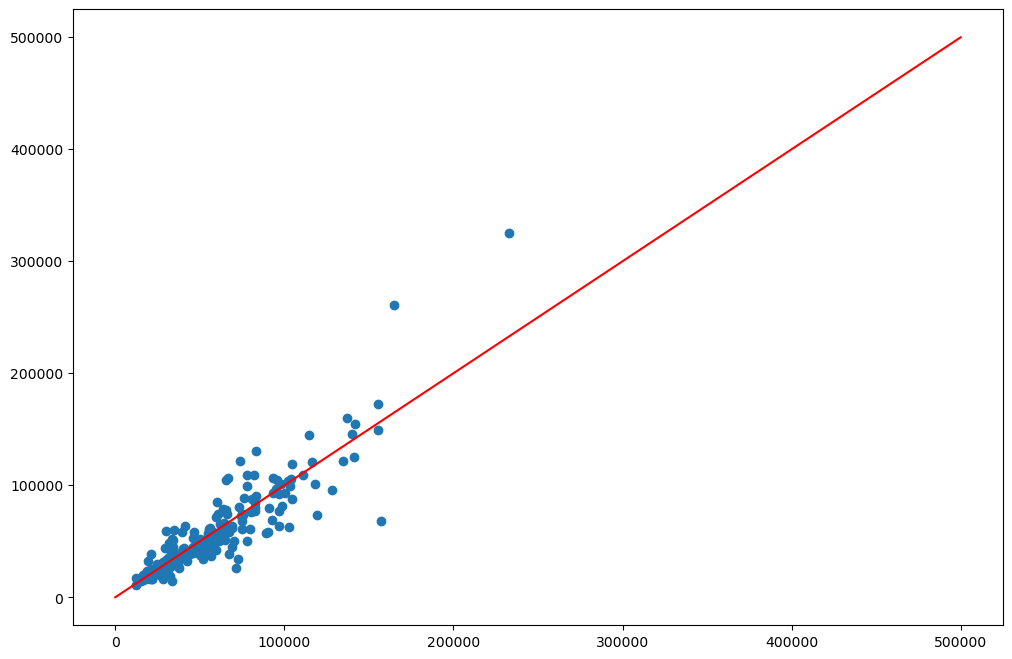

In [236]:
plt.figure(figsize=(12,8))
plt.scatter(y__pred, y_test)
plt.plot(range(0,500000), range(0,500000), c="red")

In [238]:
X_test.iloc[0]

No OS            False
MSI              False
AMD_CPU          False
Intel_CPU         True
Intel_GPU         True
AMD_GPU          False
Acer             False
Weight            1.05
Storage          False
Razer            False
Workstation      False
Ultrabook        False
SSD               True
Nvidia_GPU       False
Gaming           False
Cpu Frequency      2.5
Notebook          True
Screen Height     1080
Screen Width      1920
Ram                  8
Name: 479, dtype: object

In [240]:
X_new_scaled = scaler.transform([X_test.iloc[0]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [242]:
forest.predict(X_new_scaled)

array([75942.648])

In [262]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [244]:
y_test.iloc[0]

89084.16

In [248]:
from sklearn.linear_model import LinearRegression
Lmodel = LinearRegression()

In [252]:
Lmodel.fit(X_train, y_train)

LinearRegression()

In [256]:
L_pred = Lmodel.predict(X_test)

In [274]:
r2_score(y_test,L_pred)

0.7637792633419453

In [272]:
mean_squared_error(y_test, L_pred)**0.5

19560.52869807458

In [276]:
mean_absolute_error(y_test, L_pred)

13592.129686602439

In [278]:
from sklearn.tree import DecisionTreeRegressor

Dmodel = DecisionTreeRegressor()

In [280]:
Dmodel.fit(X_train, y_train)

DecisionTreeRegressor()

In [282]:
D_pred = Dmodel.predict(X_test)

In [284]:
r2_score(y_test,D_pred)

0.701662237947164

In [286]:
mean_squared_error(y_test, D_pred)**0.5

21982.429707889725

In [288]:
mean_absolute_error(y_test, D_pred)

14064.880564285713

In [290]:
from sklearn.ensemble import RandomForestRegressor
Rmodel = RandomForestRegressor()

In [292]:
Rmodel.fit(X_train, y_train)
R_pred = Rmodel.predict(X_test)

In [296]:
r2_score(y_test,R_pred)

0.8176693027233519

In [298]:
mean_squared_error(y_test, R_pred)**0.5

17185.076736204937

In [294]:
mean_absolute_error(y_test, R_pred)

10541.393440330532

In [300]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [304]:
adaboost = AdaBoostRegressor(
    n_estimators=50,
    learning_rate=0.1,
    random_state=42
)

In [306]:
adaboost.fit(X_train,y_train)

AdaBoostRegressor(learning_rate=0.1, random_state=42)

In [308]:
ada_pred = adaboost.predict(X_test)

In [310]:
r2_score(y_test,ada_pred)

0.7153412960810681

In [312]:
mean_squared_error(y_test, ada_pred)**0.5

21472.55941575039

In [314]:
mean_absolute_error(y_test, ada_pred)

15552.98151103335

In [316]:
import xgboost as xgb

In [318]:
xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

In [320]:
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

In [324]:
r2_score(y_test,xgb_pred)

0.8496969146043859

In [322]:
mean_squared_error(y_test, xgb_pred)**0.5

15602.907262005128

In [326]:
mean_absolute_error(y_test, xgb_pred)

9438.303558314732

In [328]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np


param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


rf = RandomForestRegressor(random_state=42)


grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')


grid_search.fit(X_train, y_train)


print("En iyi parametreler:", grid_search.best_params_)
print("En iyi çapraz doğrulama skoru:", -grid_search.best_score_)


best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print("Test seti MSE:", mse)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
En iyi parametreler: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
En iyi çapraz doğrulama skoru: 280083362.6110674
Test seti MSE: 275759612.91505986


In [330]:
275759612.91505986 ** 0.5

16606.01134875741